In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### Linear oscillator with RK45

this is similar to a cylinder oscillating within a vacuum (or air). hydrodynamic mass can be neglected in this case. system can be modelled by,
\begin{align}
m\ddot{y} + c\dot{y} + ky = 0
\end{align}

In [2]:
rho_c = 5000 #kg/m3
D = 0.1
m = rho_c * (np.pi*D**2)/4

omega_n = np.sqrt(k/m)
c_crit = 2*omega_n*1*m

print("Natural Frequency: ", omega_n)
print("Critical damping const: ", c_crit)

c = 40 
k = 1000

init_cond = [0.8*0.1, 0]
time_span = [0, 10]
dt = 0.01
t = np.arange(time_span[0], time_span[1], dt);

def lin_oscil(t, y):
    y1, y2 = y
    dy = [y2, -y1*k/m - y2*c/m]
    return dy

# Numerical solution
sol = solve_ivp(lin_oscil, time_span, init_cond, t_eval=t, method='RK45')
t = sol.t
y = sol.y.T

plt.plot(t, y)

# Analytical solution
# t2 = np.linspace(0,10,50)
# x = np.exp(-0.4*t2)*(np.cos(2.8*t2) + np.sin(2.8*t2)/7)
# plt.scatter(t2, x,color="red")
# plt.legend(['disp(numerical)', 'vel(numerical)','disp(analytical)'])
plt.show()
    

NameError: name 'k' is not defined

## Modelling non-linear damped free vibration with RK45

Differential equation,
\begin{align}
M\ddot{y} + C_1\dot{y} + C_2 |\dot{y}|\dot{y} + Ky = 0
\end{align}

In [ ]:
M = 0.5
C1 = 0.4
C2 = 0.1
K = 4

init_cond = [1, 0]
time_span = [0, 10]
dt = 0.01
t = np.arange(time_span[0], time_span[1], dt);

def non_lin_osc(t, step):
    y1, y2 = step
    dy = (y2, -C1*y2/M - C2*np.abs(y2)*y2/M - K*y1/M)
    return dy

sol = solve_ivp(non_lin_osc, time_span, init_cond, t_eval=t, method="RK45")
y1 = sol.y.T
plt.plot(t, y1, label="non-linear")
# plt.plot(t, y, label="linear")
plt.legend()
print(y)

## Free cylinder oscillation within a fluid. (submerged)

for an oscillating cylinder submerged within a fluid, damping caused by both the fluid and the structural damping. Fluid damping is caused by an additional force called Morison force.

for oscillating cylinder,
\begin{align}
\text{Morizon force} &= \text{Hydrodynamic-mass force} + \text{Drag force}\\
F &= \rho C_m A \dot{U} + \frac{1}{2}\rho D C_D U |U|
\end{align}
where,

* U = Velocity of the cylinder
* $C_D$ = Drag coefficient. (inline)
* D = Cylinder diameter
* $C_m$ = Hydraulic-mass coefficient

Hydraulic mass
\begin{align}
m' = \rho C_m A
\end{align}

here  $A = \pi r_0^2$. and $C_m$ is the hydraulic mass coefficinet.<br>
for potential flow, $C_m = 1$. This is also true for smaller KC numbers (KC <5). When KC increases $C_m$ will decrease <Mutlu page 139>

\begin{align}
KC = \frac{2\pi a}{D}
\end{align}

At this region (KC < 5) the resistive force caused by the drag drag force is smaller compared to the inertia forces hence drag force can be neglected <Mutlu page 133>. (Here in the book they have considered oscillating fluid with stationary cylinder. hence inertia force consist with both hydraulic mass force and Froude-Krilov force. Froude-Krylov force has no effect in oscillating cylinder case).

\begin{align}
\frac{F_{I, max}}{F_{D,max}} = \frac{\pi^2 C_M}{KC\; C_D} = \frac{20}{KC}
\end{align}

* 0 < KC < 20-30 => intertia-dominated region
* 20-30 < KC => drag-dominated region

#### IMPORTENT
Due to the domination of inertia force at low KC region. we can neglect the drag term. This will make the equation linear.
when KC < 5, 

hence with the Morison's force,
\begin{align}
m\ddot{y} + c\dot{y} + ky = F\\
(m + m')\ddot{y} + c\dot{y} + \frac{1}{2}\rho C_d D |\dot{y}|\dot{y} + ky = 0
\end{align}


#### ASSUMPTIONS
* This analysis is 2D analysis. cylinder length has not considered.
* $10^3 < Re < 10^5$, Mean drag Coefficient ($C_D$) = 1 (C_D will not be a constant out of the Re range)
* for small amplitude vibrations; KC < 5, $C_m = 1$ 


at KC = 5,$\frac{A}{D} = 0.8$ hence should be A < 0.8 D.


### state-space representation of above system
let state, 
* $y_1 = y$
* $y_2 = \dot{y}$.

then space-state model,

\begin{align}
\begin{bmatrix}
\dot{y_1}\\
\dot{y_2}
\end{bmatrix} = 
\begin{bmatrix}
y_2\\
\frac{-c}{M}y_2 - \frac{C_2}{M}|y_2|y_2 - \frac{K}{M}y_1
\end{bmatrix}
\end{align}

### METHOD 1: CONSIDERING NON-LINEAR DAMPING TERM

In [ ]:
Cm = 1
Cd = 1.5
k = 1000
c = 20

# cylinder
rho_c = 5000 #kg/m3
D = 0.1
m = rho_c * (np.pi*D**2)/4

# water
rho = 1000
m_h = Cm * rho * (np.pi*D**2)/4

M = m + m_h
C2 = rho*Cd*D/2

init_cond = [0.8*D, 0]
T = 10
time_span = [0,T]
dt = 0.01
t = np.arange(0,T,dt)

def oscil(t, step):
    y1, y2 = step
    dt = [y2, -c*y2/M - C2*np.abs(y2)*y2/M - k*y1/M]
    return dt

sol = solve_ivp(oscil, time_span, init_cond, t_eval=t, method='RK45')
y2 = sol.y.T
plt.plot(t, y2, label="Submerged cylinder")


plt.title("Submerged cylinder free oscillation (with drag)")
plt.legend()
plt.show()

### METHOD 2: LINEAR EQUIVALENT DAMING FACTOR

According to <Mutlu's page 43 figure 2.7> mean drag coefficient increases at lower Re. Wnen the cylinder is slowing down this mean drag should be varing. so the damping is not constant. 

let $\zeta$ equivalent viscous damping factor is introduced to represent the structural damping and fluid damping. <Mutlu's page 348>

Total damping factor (in this case equivalent viscous damping),
\begin{align}
\frac{E_d}{E_T} = 4\pi\zeta_s
\end{align}
<Mutlu's page 348>

\begin{align}
\zeta_f &= \frac{\rho D^2}{4\pi(m + m')} \frac{8}{3} C_D \frac{A}{D}\\
\zeta_s &= \frac{c}{2(m + m')\omega_d}
\end{align}

total damping factor,

\begin{align}
\zeta_t = \zeta_f + \zeta_s
\end{align}

system is represented by,
\begin{align}
(m + m')\ddot{y} + c\dot{y} + \frac{1}{2}\rho C_D D |\dot{y}|\dot{y} + ky &= 0\\
\ddot{y} + \frac{c}{(m + m')}\dot{y} +\frac{1}{2(m+m')}\rho C_D D |\dot{y}| \dot{y} + \frac{k}{(m+m')}y &= 0
\end{align}

equivalent system,
\begin{align}
\ddot{y} + 2\omega_n\zeta_t \dot{y} + \omega_n^2 y = 0
\end{align}
where, 
\begin{align}
\zeta_t &= \frac{c}{2(m + m')\omega_d} + \frac{\rho D^2}{4\pi(m + m')} \frac{8}{3} C_D \frac{A}{D} \\
\omega_n &= \sqrt{\frac{k}{(m + m')}}
\end{align}

here the term $C_D$ should be found referring to Fredsoe and Justesen(1986 fig 7) for each cycle. <Mutlu's page 351>

In [ ]:
Cm = 1
Cd = 1
k = 1000
c = 20

# cylinder
rho_c = 5000 #kg/m3
D = 0.1
m = rho_c * (np.pi*D**2)/4

# water
rho = 1000
m_h = Cm * rho * (np.pi*D**2)/4

M = m + m_h
C2 = rho*Cd*D/2

init_cond = [0.8*D, 0]
T = 10
time_span = [0,T]
dt = 0.01
t = np.arange(0,T,dt)


zeta_s = c/(2*omega_n*M)
zeta_f = (rho*D**2)*(8*Cd*np.pi*D**2)/(4*M*np.pi*3*D*4)
zeta_t = zeta_s + zeta_f

def oscil(t, step):
    y1, y2 = step
    dt = [y2, -2*zeta_t*omega_n*M*y2/M - k*y1/M]
    return dt

sol = solve_ivp(oscil, time_span, init_cond, t_eval=t, method='RK45')
y3 = sol.y.T
plt.plot(t, y2, label="Method 01")
plt.plot(t, y3, label="Method 02")


plt.title("Submerged cylinder free oscillation (with drag)")
plt.legend()
plt.show()

Has large daviation from the method 01. with increasing Cd daviation becomes smaller

Drag term can be neglected considering that when KC < 5

In [ ]:
Cm = 1
Cd = 1
k = 1000
c = 20

# cylinder
rho_c = 5000 #kg/m3
D = 0.1
m = rho_c * (np.pi*D**2)/4

# water
rho = 1000
m_h = Cm * rho * (np.pi*D**2)/4

M = m + m_h
C2 = rho*Cd*D/2


init_cond = [0.8*D, 0]
T = 10
time_span = [0,T]
dt = 0.01
t = np.arange(0,T,dt)

def oscil(t, step):
    y1, y2 = step
    dt = [y2, -c*y2/M - C2*np.abs(y2)*y2/M - k*y1/M]
    return dt

sol = solve_ivp(oscil, time_span, init_cond, t_eval=t, method='RK45')
y3 = sol.y.T
plt.plot(t, y3, label="C_D = 0")
plt.plot(t, y2, label="C_D != 0")
# plt.plot(t, y4, label='Cylinderrr')
plt.title("FIGURE 01: Submerged cylinder free oscillation with and without non-linear damping term")
plt.legend()
plt.show()

### LIMITATIONS

1. In this method we assume $C_D$ to be constant. But drag coefficient will vary with the Reynold's number and Keulegan-Carpenter number $C_D = f(Re,KC)$.
2. In here we assumed hydrodynamic-mass coefficient to be 1. Hence KC < 5 according to [Sarpkaya1986]. hence amplituds larger than 0.8 x D will not agree with the solutions


# VORTEX INDUCED VIBRATIONS

In here the lift force generated by vortex induced vibration is considered as a sinosoidal force. then,
\begin{align}
m\ddot{y} + c_1\dot{y} + c_2 |\dot{y}| \dot{y} + ky = F_L\\
\end{align}
where, 
\begin{align}
c_2 &= \frac{1}{2}\rho C_D D |\dot{y}|\\
F_L &= \frac{1}{2}\rho C_F' D U_{stream}^2\\
C_D' &= \sqrt{2}(\overline{C_D'^2})^{\frac{1}{2}}sin(\omega_v t)
\end{align}

Maximum amplitude will be occurred when the vortex shedding freqency is equal to the natural frequency of the body.
\begin{align}
f_v = f_n
\end{align}

In this model we consider the fluid damping

In [ ]:
Cm = 1
Cd = 1
CL_rms = 0.3 # average for subcritical Re domain <Mutlu page369>
St = 0.2
k = 1000
c = 2

# cylinder
rho_c = 5000 #kg/m3
D = 0.1
m = rho_c * (np.pi*D**2)/4

# water
rho = 1000
m_h = Cm * rho * (np.pi*D**2)/4
U = 0.356 #0.356 # free stream velocity when the vortex shedding freqency approach the natural frequency of the system.

M = m + m_h

omega_n = np.sqrt(k/M)
fn = omega_n/(2*np.pi)
U = fn*D/St
C2 = rho*Cd*D/2
F0 = rho*D*U**2 * np.sqrt(2)*CL_rms/2
# Ks = 2*M*2*np.pi*zeta_s/(rho*D**2)

print("M", M)
print("omega_n", omega_n)
print("fn", fn)
print("U", U)
# print("Structural Damping", zeta_s)
# print("fluid damping", zeta_f)
# print("damping_total", zeta_f + zeta_s)
# print("Ks", Ks)

init_cond = [0, 0]
T = 40
time_span = [0,T]
dt = 0.01
t = np.arange(0,T,dt)
max_vel = 0
max_amp = 0
max_C2 = 0

def VIV_lin(t, step):
    global max_vel
    global max_amp
    global max_C2

    y1, y2 = step
    if y2 > max_vel:
        max_vel = y2
    if y1 > max_amp:
        max_amp = y1

    Re = y2*D/(1.004e-6)
    if Re > max_C2:
        max_C2 = Re
    
    dt = [y2, F0*np.sin(omega_n*t)/M - c*y2/M - C2*np.abs(y2)*y2/M - k*y1/M]
    return dt

sol = solve_ivp(VIV_lin, time_span, init_cond, t_eval=t, method="RK45")
plt.figure(figsize=(14,5))
plt.plot(t, sol.y.T)
plt.grid()
plt.title("FIGURE 02: Displacement and velocity of cylinder with non-linear damping")
# plt.plot(t, F0*np.sin(omega_n*t)/M)
print("maximum velocity:", max_vel)
print("maximun amplitude: ", max_amp)
print("maximum Reynold's number:", max_C2)
plt.show()

in the above example we have considred the fluid damping by approximating the drag coefficient to be unity througout the region

This in here the stability parameter, $K_s = \frac{2(m+m')(2\pi\zeta_s)}{\rho D^2}$

In [Mutlu's page 366] they haven't considered the fluid damping while obtaining (only structural damping). Structural damping should be kept at a minimum value to obtain this kind of response. Amplitude will be reduced for increased damping.

# MODEL FOR EQUIVALENT DAMPING COEFFICIENT



\begin{align}
(m + m')\ddot{y} + c_1\dot{y} + c_2 |\dot{y}| \dot{y} + ky = F_L\\
\end{align}
where, 
\begin{align}
c_2 &= \frac{1}{2}\rho C_D D |\dot{y}|\\
F_L &= \frac{1}{2}\rho C_F' D U_{stream}^2\\
C_D' &= \sqrt{2}(\overline{C_D'^2})^{\frac{1}{2}}sin(\omega_v t)
\end{align}
$c_1$ represent the structural damping (here we assume it to be linear
This is non-linear diff. equation due to the non-linear damping term $c_2$. due to the non-linearity obtaining solution is challenging.

In [ ]:
Cm = 1
Cd = 1
CL_rms = 0.3 # average for subcritical Re domain <Mutlu page369>
St = 0.2
k = 1000
c = 0

# cylinder
rho_c = 5000 #kg/m3
D = 0.1

# water
rho = 1000
m_h = Cm * rho * (np.pi*D**2)/4
m = rho_c * (np.pi*D**2)/4

# Total mass of the cylinder includes the hydrodynamic mass
M = m + m_h

# Natural frequency of the cylinder
omega_n = np.sqrt(k/M)

# at the resonance
omega_v = omega_n

# vortex shedding frequency
fv = omega_v/(2*np.pi)
U = fv*D/St

# Hydrodynamic drag force
C2 = rho*Cd*D/2

# Lifting force on cylinder
F0 = rho*D*U**2 * np.sqrt(2)*CL_rms/2
# Ks = 2*M*2*np.pi*zeta_s/(rho*D**2)

print("M", M)
print("omega_n", omega_n)
print("U", U)
# print("Structural Damping", zeta_s)
# print("fluid damping", zeta_f)
# print("damping_total", zeta_f + zeta_s)
# print("Ks", Ks)

init_cond = [0, 0]
T = 60
time_span = [0,T]
dt = 0.01
t = np.arange(0,T,dt)
max_vel = 0
max_amp = 0
max_C2 = 0

def VIV_lin(t, step):
    global max_vel
    global max_amp
    global max_C2

    y1, y2 = step
    if y2 > max_vel:
        max_vel = y2
    if y1 > max_amp:
        max_amp = y1

    Re = y2*D/(1.004e-6)
    if Re > max_C2:
        max_C2 = Re
    
    dy = [y2, F0*np.sin(omega_n*t)/M - c*y2/M - C2*np.abs(y2)*y2/M - k*y1/M]
    return dy

sol = solve_ivp(VIV_lin, time_span, init_cond, t_eval=t, method="RK45")
plt.figure(figsize=(14,5))
plt.plot(t, sol.y.T)
plt.grid()
plt.title("FIGURE 02: Displacement and velocity of cylinder with non-linear damping")
# plt.plot(t, F0*np.sin(omega_n*t)/M)
print("maximum velocity:", max_vel)
print("maximun amplitude: ", max_amp)
print("maximum Reynold's number:", max_C2)
plt.show()

* The steady state response of the vortex-induced vibration of the cylinder is sinusoidal. Excitation of the VIV is through the vortex motion in the cylinder's wake. at the steady state cylinder's amplitude and oscillation frequency is constant even though the forces are non-linear. 

* At the resonance forcing frequency is equal to the natural frequency($f_n$) of the structure/cylinder. If we assume the vortex shedding mode is 2s then the vortex shedding frequency($f_v$) is equal to the forcing frequency. Hence at the resonance, vortex shedding frequency is equal to the natural frequency of the structure. since this is forced vibration forcing frequency is also equal to the response frequency($f_{cyl}$)

\begin{align}
f_v = f_n = f_{cyl}\\
\end{align}

* Since the oscillation amplitude and frequency is constant in the steady state response, Energy in the structure stays the same. Hence the rate of energy gain by the fluid should be equal to the rate of energy dissipation through the total damping of the structure. since, $ f_{cyl} = f_v$ energy gained per cycle should equal to the energy loss per cycle.

* At the resonance phase lag between forcing and responce is about $90^o$

Hence per cycle,
\begin{align}
E_{gained, forcing} &= E_{loss, damping}\\
\oint F_L'\dot{y}\;dt &= \oint c_{eq} \dot{y}^2 \; dt\\
\end{align}
With equivalent damping, 
\begin{align}
c_{eq} = \frac{\rho U^2 D C_{L, rms} sin(\phi)}{\sqrt{2} y_m \omega}
\end{align}

according to the above equation if we know $y_m$, the maximum amplitude of the system. we can approximate $c_{eq}$.

In [ ]:
y_m = max_amp
c_eq = rho*U**2*D*CL_rms*np.sin(np.pi/2)/(np.sqrt(2)*y_m*omega_n)
c_eq

In [ ]:
Cm = 1
Cd = 1
CL_rms = 0.3 # average for subcritical Re domain <Mutlu page369>
St = 0.2
k = 1000
c = c_eq

# cylinder
rho_c = 5000 #kg/m3
D = 0.1
m = rho_c * (np.pi*D**2)/4

# water
rho = 1000
m_h = Cm * rho * (np.pi*D**2)/4
U = 0.356 #0.356 # free stream velocity when the vortex shedding freqency approach the natural frequency of the system.

M = m + m_h

omega_n = np.sqrt(k/M)
fn = omega_n/(2*np.pi)
U = fn*D/St
C2 = 0
F0 = rho*D*U**2 * np.sqrt(2)*CL_rms/2
# Ks = 2*M*2*np.pi*zeta_s/(rho*D**2)

print("M", M)
print("omega_n", omega_n)
print("fn", fn)
print("U", U)
# print("Structural Damping", zeta_s)
# print("fluid damping", zeta_f)
# print("damping_total", zeta_f + zeta_s)
# print("Ks", Ks)

init_cond = [0, 0]
T = 60
time_span = [0,T]
dt = 0.01
t = np.arange(0,T,dt)
max_vel = 0
max_amp = 0
max_C2 = 0

def VIV_lin(t, step):
    global max_vel
    global max_amp
    global max_C2

    y1, y2 = step
    if y2 > max_vel:
        max_vel = y2
    if y1 > max_amp:
        max_amp = y1

    Re = y2*D/(1.004e-6)
    if Re > max_C2:
        max_C2 = Re
    
    dt = [y2, F0*np.sin(omega_n*t)/M - c*y2/M - C2*np.abs(y2)*y2/M - k*y1/M]
    return dt

sol = solve_ivp(VIV_lin, time_span, init_cond, t_eval=t, method="RK45")
plt.figure(figsize=(14,5))
plt.plot(t, sol.y.T)
plt.grid()
plt.title("FIGURE 02: Displacement and velocity of cylinder with non-linear damping")
# plt.plot(t, F0*np.sin(omega_n*t)/M)
print("maximum velocity:", max_vel)
print("maximun amplitude: ", max_amp)
print("maximum Reynold's number:", max_C2)
plt.show()

## Steady state response

linearized vibration equation

\begin{align}
\ddot{y} + P \dot{y} + Q y = F_m sin(\omega t)
\end{align}

\begin{align}
P &= \frac{c_{eq}}{M} \\
Q &= \frac{k}{M}\\
F_m &= \frac{\rho D U^2 C_{L,rms}}{\sqrt{2}M}
\end{align}

steady state response
\begin{align}
y &= \sqrt{X_1^2 + X_2^2}sin(\omega t + \phi)
\end{align}
where,
\begin{align}
X_1 &= \frac{F_m (Q - \omega^2)}{(Q-\omega^2)^2 + \omega^2 P^2}\\
X_2 &= \frac{- F_m \omega P}{(Q-\omega^2)^2 + \omega^2 P^2}\\
\phi &= arcsin\left(\frac{X_2}{\sqrt{X_1^2 + X_2^2}}\right)
\end{align}

In [ ]:
omega = omega_v
P = c/M
Q = k/M
Fm = rho*D*U**2 *L *CL_rms/(np.sqrt(2)*M)
X1 = Fm*(Q - omega**2)/((Q - omega**2)**2 + omega**2 * P**2)
X2 = -Fm*omega*P/((Q - omega**2)**2 + omega**2 * P**2)
phi = np.arcsin(X1/np.sqrt(X1**2 + X2**2))
Amax = np.sqrt(X1**2 + X2**2)

t = np.arange(0,60,0.01)
y = Amax*np.sin(omega*t + phi)
plt.figure(figsize=(14,5))
plt.plot(t, y)
print("D", D)
print("L", L)
print("m", m)
print("M", M)
print("max amplitude:", Amax)
print("omega:", omega)

## Method 02: Power calculation using numerical methods

## <u>SCALED MODEL DEVELOPMENT<u>

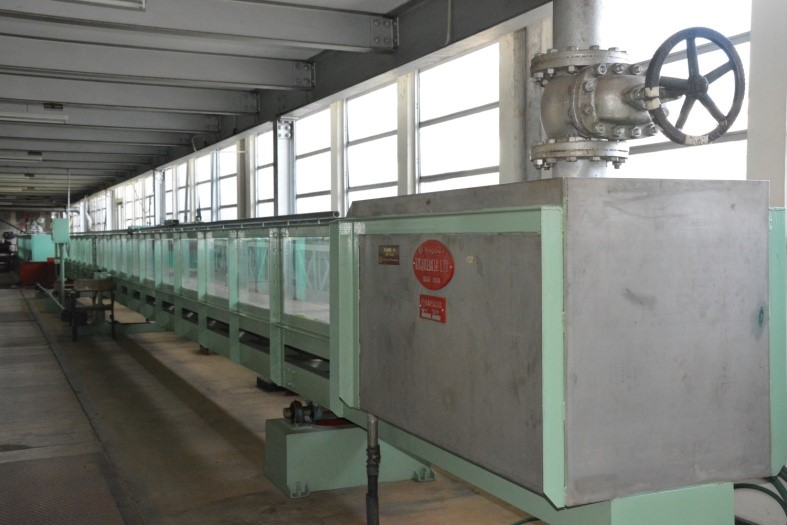

<u> Dimensions <u>

Width = 400 mm <br>
Height = 450 mm

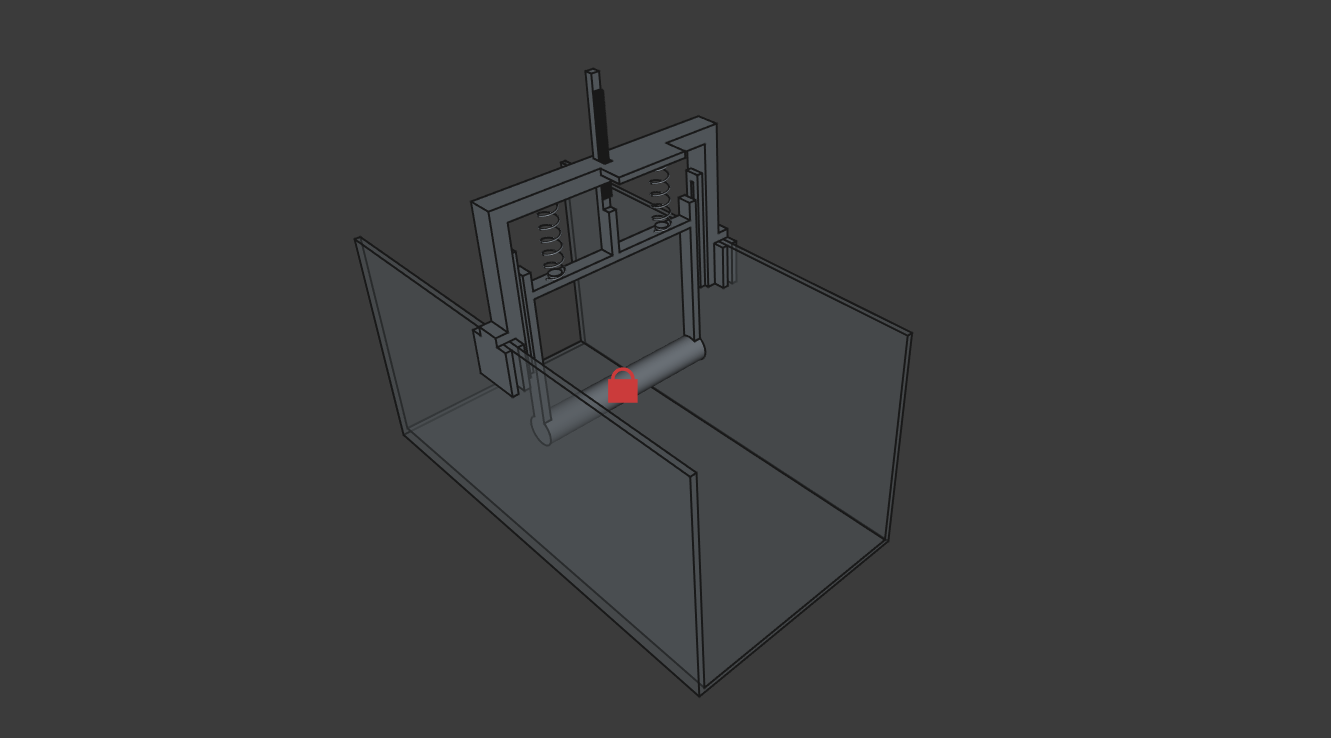

## NON LINEAR MODEL CONSIDERING CORRELATION LENGTH

PARAMETERS

In [39]:
Cm = 1
Cd = 1
CL_rms = 0.3 # average for subcritical Re domain <Mutlu page369>
St = 0.2
k = 1000
c = 0

# cylinder
rho_c = 2000 #kg/m3
D = 0.15
corr_l = 6
L = D*corr_l

# water
rho = 1000
m_h = Cm * rho*L* (np.pi*D**2)/4
m = rho_c *L* (np.pi*D**2)/4

# Total mass of the cylinder includes the hydrodynamic mass
M = m + m_h

# Natural frequency of the cylinder
omega_n = np.sqrt(k/M)

# at the resonance
omega_v = omega_n

# vortex shedding frequency
fv = omega_v/(2*np.pi)
fn = fv
U = fv*D/St

print("D", D)
print("L", L)
print("M", M)
print("omega_n", omega_n)
print("U", U)

D 0.15
L 0.8999999999999999
M 47.712938426394985
omega_n 4.578064616571136
U 0.546466210141049


maximum velocity: 0.3938629224123017
maximun amplitude:  0.08588051477876933
maximum Reynold's number: 58844.06211339169


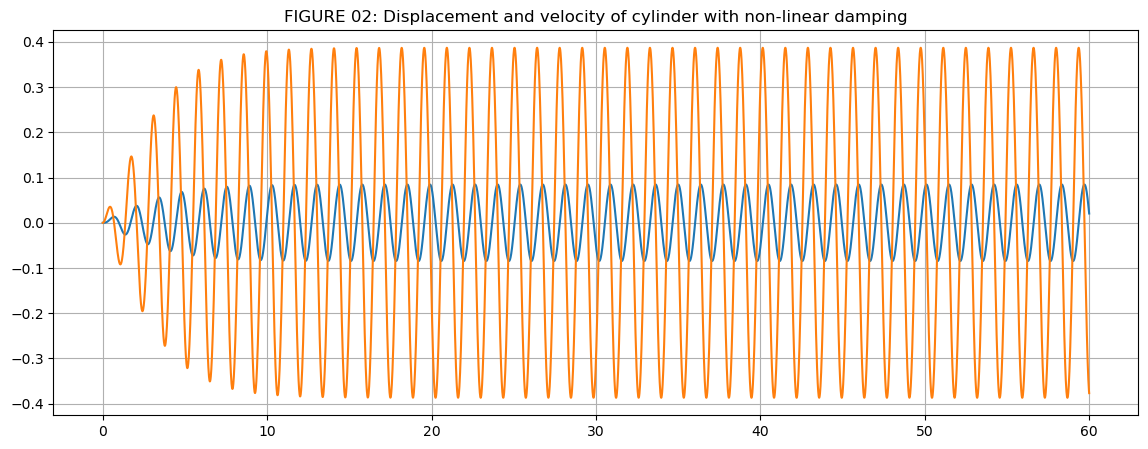

In [40]:
# Hydrodynamic drag force
C2 = L*rho*Cd*D/2

# Lifting force on cylinder
F0 = rho*D*U**2 *L* np.sqrt(2)*CL_rms/2
# Ks = 2*M*2*np.pi*zeta_s/(rho*D**2)


# print("Structural Damping", zeta_s)
# print("fluid damping", zeta_f)
# print("damping_total", zeta_f + zeta_s)
# print("Ks", Ks)

init_cond = [0, 0]
T = 60
time_span = [0,T]
dt = 0.01
t = np.arange(0,T,dt)
max_vel = 0
max_amp = 0
max_C2 = 0

def VIV_lin(t, step):
    global max_vel
    global max_amp
    global max_C2

    y1, y2 = step
    if y2 > max_vel:
        max_vel = y2
    if y1 > max_amp:
        max_amp = y1

    Re = y2*D/(1.004e-6)
    if Re > max_C2:
        max_C2 = Re
    
    dy = [y2, F0*np.sin(omega_n*t)/M - c*y2/M - C2*np.abs(y2)*y2/M - k*y1/M]
    return dy

sol = solve_ivp(VIV_lin, time_span, init_cond, t_eval=t, method="RK45")
plt.figure(figsize=(14,5))
plt.plot(t, sol.y.T)
plt.grid()
plt.title("FIGURE 02: Displacement and velocity of cylinder with non-linear damping")
# plt.plot(t, F0*np.sin(omega_n*t)/M)
print("maximum velocity:", max_vel)
print("maximun amplitude: ", max_amp)
print("maximum Reynold's number:", max_C2)
plt.show()

In [41]:
y_m = max_amp
c_eq = L*rho*U**2*D*CL_rms*np.sin(np.pi/2)/(np.sqrt(2)*y_m*omega_n)
c_eq

21.75154422689701

## LINEARIZED MODEL CONSIDERING CORRELATION LENGTH

D 0.1
L 0.8999999999999999
M 54.977871437821385
omega_n 4.264872372458462
fn 0.6787755197328231
U 0.3393877598664115
maximum velocity: 0.20412705773973888
maximun amplitude:  0.047794692734483175
F0 0.039999374088032134


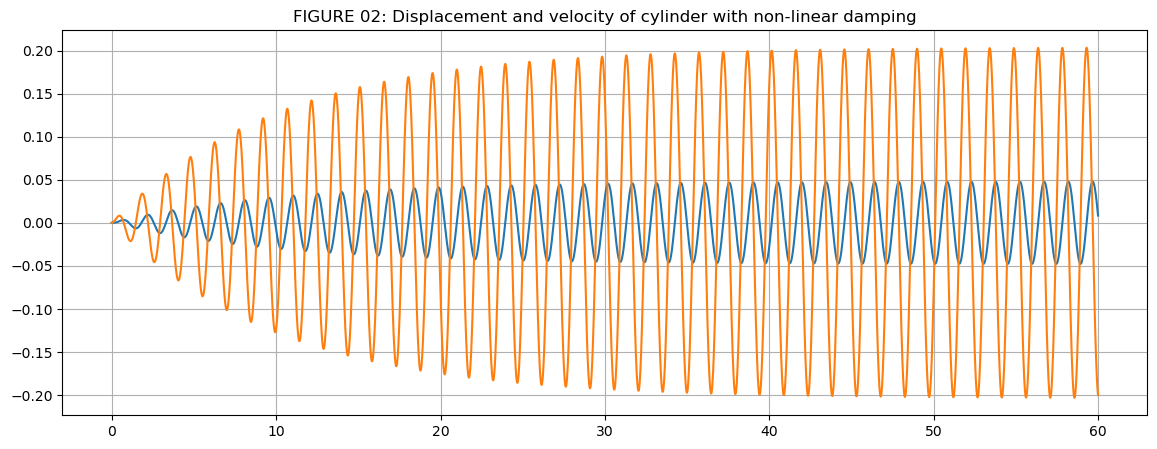

In [46]:
c = c_eq
M = m + m_h
U = fn*D/St
F0 = rho*D*U**2*L* np.sqrt(2)*CL_rms/2
# Ks = 2*M*2*np.pi*zeta_s/(rho*D**2)

print("D", D)
print("L", L)
print("M", M)
print("omega_n", omega_n)
print("fn", fn)
print("U", U)
# print("Structural Damping", zeta_s)
# print("fluid damping", zeta_f)
# print("damping_total", zeta_f + zeta_s)
# print("Ks", Ks)

init_cond = [0, 0]
T = 60
time_span = [0,T]
dt = 0.01
t = np.arange(0,T,dt)
max_vel = 0
max_amp = 0
max_C2 = 0

def VIV_lin(t, step):
    global max_vel
    global max_amp
    global max_C2

    y1, y2 = step
    if y2 > max_vel:
        max_vel = y2
    if y1 > max_amp:
        max_amp = y1

    Re = y2*D/(1.004e-6)
    if Re > max_C2:
        max_C2 = Re
    
    dt = [y2, F0*np.sin(omega_n*t)/M - c*y2/M - k*y1/M]
    return dt

sol = solve_ivp(VIV_lin, time_span, init_cond, t_eval=t, method="RK45")
plt.figure(figsize=(14,5))
plt.plot(t, sol.y.T)
plt.grid()
plt.title("FIGURE 02: Displacement and velocity of cylinder with non-linear damping")
# plt.plot(t, F0*np.sin(omega_n*t)/M)
print("maximum velocity:", max_vel)
print("maximun amplitude: ", max_amp)
print("F0", F0/M)
plt.show()

## Variation of the response with L/D

linearized vibration equation

\begin{align}
\ddot{y} + P \dot{y} + Q y = F_m sin(\omega t)
\end{align}

\begin{align}
P &= \frac{c_{eq}}{M} \\
Q &= \frac{k}{M}\\
F_m &= \frac{\rho D U^2 C_{L,rms}}{\sqrt{2}M}
\end{align}

steady state response
\begin{align}
y &= \sqrt{X_1^2 + X_2^2}sin(\omega t + \phi)
\end{align}
where,
\begin{align}
X_1 &= \frac{F_m (Q - \omega^2)}{(Q-\omega^2)^2 + \omega^2 P^2}\\
X_2 &= \frac{- F_m \omega P}{(Q-\omega^2)^2 + \omega^2 P^2}\\
\phi &= arcsin\left(\frac{X_2}{\sqrt{X_1^2 + X_2^2}}\right)
\end{align}

D 0.1
L 0.8999999999999999
m 47.1238898038469
M 54.977871437821385
max amplitude: 0.013739691830858087
omega: 4.578064616571136
X1 -0.013070985038558703 X2 -0.004234203789229209
phi -0.31327209795986427


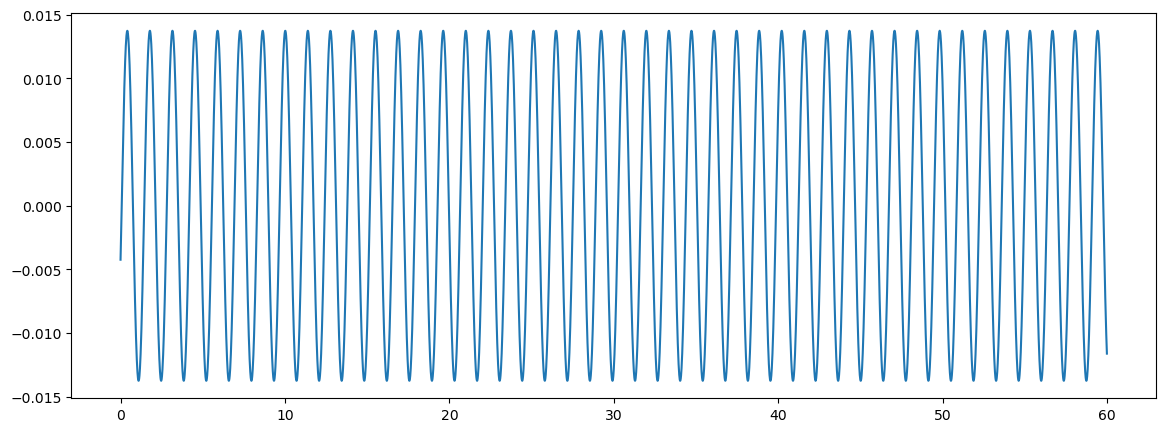

In [47]:
omega = omega_v
P = c/M
Q = k/M
Fm = rho*D*U**2 *L *CL_rms/(np.sqrt(2)*M)
X1 = Fm*(Q - omega**2)/((Q - omega**2)**2 + omega**2 * P**2)
X2 = -Fm*omega*P/((Q - omega**2)**2 + omega**2 * P**2)
phi = np.arcsin(X2/np.sqrt(X1**2 + X2**2))
Amax = np.sqrt(X1**2 + X2**2)

t = np.arange(0,60,0.01)
y = Amax*np.sin(omega*t + phi)
plt.figure(figsize=(14,5))
plt.plot(t, y)
print("D", D)
print("L", L)
print("m", m)
print("M", M)
print("max amplitude:", Amax)
print("omega:", omega)
print("X1", X1, "X2", X2)
print("phi", phi)

# <u>NON-DIMENSIONALIZED MODEL</u>


\begin{align}
(m + m') \ddot{y} + c_E \dot{y} + K y = F'_L(t)
\end{align}


Above model can be represented in non-dimensional form using following non-dimensional parameters.

\begin{align}
\text{reduced velocity} (V_r) &= \frac{U}{fD}\\
T &= \frac{t U}{D}\\
Y &= \frac{y}{D}\\
M &= \frac{(m + m')}{\rho_w D}\\
\dot{y} &= U\dot{Y}\\
\ddot{y} &= \frac{U^2}{D} \ddot{Y}\\
\Omega &= 2\pi St
\end{align}


Then the equation can be written as,

\begin{align}
\ddot{Y}(T) + \frac{4\pi\zeta_s}{V_r}\dot{Y}(T) + \frac{4\pi^2}{V_r^2}Y(T) = \frac{C_{L,RMS}}{\sqrt{2}M} sin(\Omega T)
\end{align}


Let,
\begin{align}
B &= \frac{4\pi\zeta_E}{V_r}\\
C &= \frac{4\pi^2}{V_r^2}\\
F_0 &= \frac{C_{L, RMS}}{\sqrt{2} M}
\end{align}

then final form,
\begin{align}
\ddot{Y} + B\dot{Y} + CY = F_0 sin(\Omega T)
\end{align}
## Numerical model


let,
\begin{align}
Y_1 &= Y\\
Y_2 &= \dot{Y}
\end{align}

\begin{align}
\begin{bmatrix}
\dot{Y_1}\\
\dot{Y_2}
\end{bmatrix} = 
\begin{bmatrix}
Y_2\\
F_0 sin(\Omega T) - BY_2 - CY_1
\end{bmatrix}
\end{align}

0.5184233665097756
Ks: 2.8933881011162237
Vr: 4.999999999999999
M 2.3561944901923444


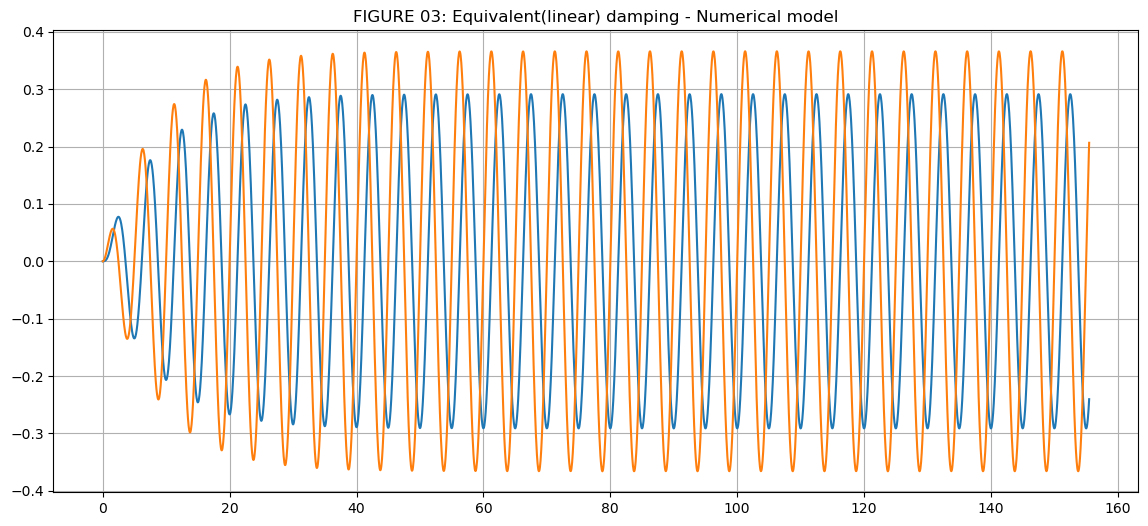

In [61]:
Cm = 1
Cd = 1avg
CL_rms = 0.3 # average for subcritical Re domain <Mutlu page369>
St = 0.2
k = 1000
c_eq = 10.77

# cylinder
rho_c = 2000 #kg/m3
D = 0.1
m = rho_c * (np.pi*D**2)/4

# water
rho = 1000
m_h = Cm * rho * (np.pi*D**2)/4
omega_n = np.sqrt(k/(m + m_h))
fn = omega_n/(2*np.pi)
U = fn*D/St # flow velocity at the resonance frequency is equal to the vortex shedding frequency 0.356
print(U)

zeta_eq = c_eq/(2*omega_n*(m+m_h))
M = (m + m_h)/(rho*D**2)
Vr = U/(fn*D)
Omega = 2*np.pi*St
B = 4*np.pi*zeta_eq/Vr
C = 4*np.pi**2/(Vr**2)
F0 = CL_rms/(np.sqrt(2)*M)

init_cond = [0, 0]
tf = 30
Tf = (U/D)*tf
time_span = [0,Tf]
dt = 0.01
t = np.arange(0,tf,dt)
T = (U/D)*t

Ks = 2*M*(2*np.pi*zeta_eq);
print("Ks:",Ks)
print("Vr:", Vr)
print("M", M)

def VIV_ND_01(T, step):
    Y1, Y2 = step
    dY = [Y2, -B*Y2 - C*Y1 + F0*np.sin(Omega*T)]
    return dY

sol = solve_ivp(VIV_ND_01, time_span, init_cond, t_eval=T, method="RK45")
plt.figure(figsize=(14,6))
plt.plot(T, sol.y.T, label="Vr=5")
plt.title("FIGURE 03: Equivalent(linear) damping - Numerical model")
plt.grid()
plt.show()

## steady state


By solving the above differentail equation, particular integral was obtained.

\begin{align}
Y = \sqrt{X_1^2 + X_2^2} \;sin(\Omega T + \phi)
\end{align}
where,

\begin{align}
X_1 &= \frac{F_0 (C - \Omega^2)}{(C - \Omega^2)^2 - B^2\Omega^2}\\
X_2 &= \frac{B\Omega F_0}{(C - \Omega^2)^2 - B^2\Omega^2}
\end{align}

Then,
\begin{align}
Y &= \sqrt{X_1^2 + X_2^2} \;sin(\Omega T + \phi) \\
\phi &= cos^{-1}\left(\frac{X_1}{\sqrt{X_1^2 + X_2^2}}\right) \\
\end{align}

$\phi$ is the phase lag of displacement compared to forcing.


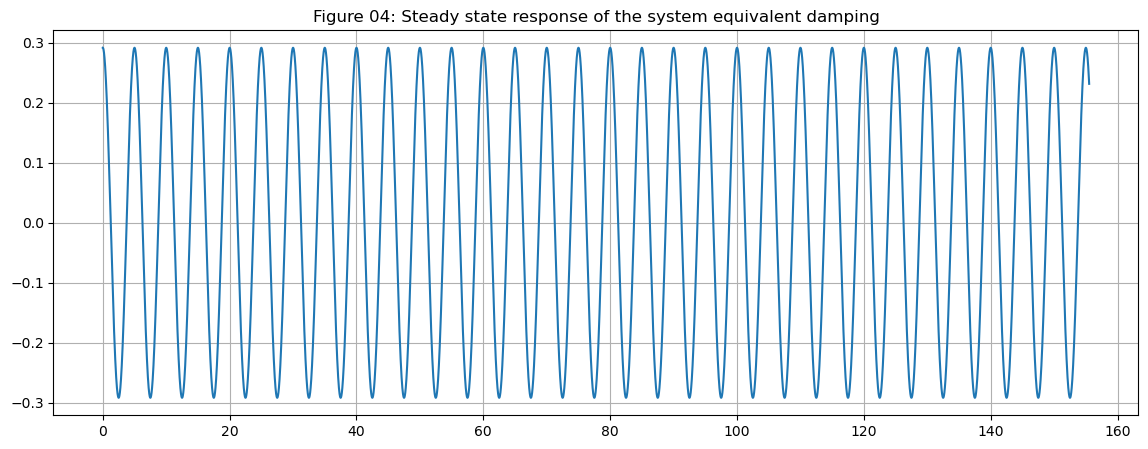

0.29171563471615264


In [62]:

X1 = F0*(C-Omega**2)/((C-Omega**2) + B**2*Omega**2)
X2 = -B*Omega*F0/((C-Omega**2) + B**2*Omega**2)
Ampl = np.sqrt(X1**2 + X2**2)
T = np.arange(0, Tf, 0.01)
phi = np.arccos(X1/np.sqrt(X1**2 + X2**2))
Y = np.sqrt(X1**2 + X2**2)*np.sin(Omega*T + phi)
plt.figure(figsize=(14,5))
plt.grid()
plt.title("Figure 04: Steady state response of the system equivalent damping")
plt.plot(T, Y)
plt.show()
print(Ampl)

# EFFECTS OF PARAMETER CHANGE

## MASS RATIO
\begin{align}
M &= \frac{(m + m')}{\rho_w D}\\
\end{align}




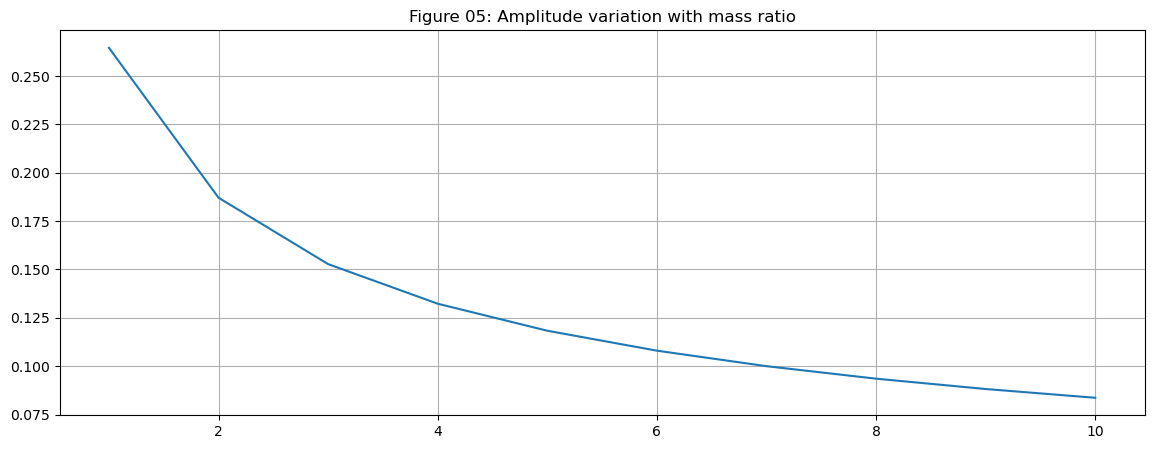

[0.2645727735824849, 0.18708120231750805, 0.15275116204809336, 0.13228638679124216, 0.11832054134521905, 0.10801138251833178, 0.09999910893969308, 0.09354060115875364, 0.08819092452749447, 0.08366525713886737]


In [54]:
Mvals = np.linspace(1,10,10)
maxAmps = []

# zeta_eq = c_eq/(2*omega_n*(m+m_h))
# M = (m + m_h)/(rho*D**2)
for M in Mvals:
    # omega_n = np.sqrt(k/(m + m_h))
    omega_n = np.sqrt(k/(M*rho*D**2))
    # print(omega_n)
    zeta_eq = c_eq/(2*omega_n*M*(rho*D**2))
    Vr = U/(fn*D)
    Omega = 2*np.pi*St
    B = 4*np.pi*zeta_eq/Vr
    C = 4*np.pi**2/(Vr**2)
    F0 = CL_rms/(np.sqrt(2)*M)
    
    X1 = F0*(C-Omega**2)/((C-Omega**2) + B**2*Omega**2)
    X2 = -B*Omega*F0/((C-Omega**2) + B**2*Omega**2) 
    Y = np.sqrt(X1**2 + X2**2)
    maxAmps.append(Y)
plt.figure(figsize=(14,5))
plt.grid()
plt.title("Figure 05: Amplitude variation with mass ratio")
plt.plot(Mvals, maxAmps)
plt.show()
print(maxAmps)

## PTO DESIGN

Total energy loss from the system
\begin{align}
E_{loss,per-cycle} &= \int_0^T c_t \dot{y}^2 dt\\
&= \int_0^{2\pi/\omega} c_t y_m^2 \omega^2 cos^2(\omega t + \phi) dt\\
&= c_t y_m \omega \pi
\end{align}

Rate of energy loss from the system (avg) due to damping
\begin{align}
P_{loss} &= \frac{c_t y_m^2 \omega^2}{2}
\end{align}

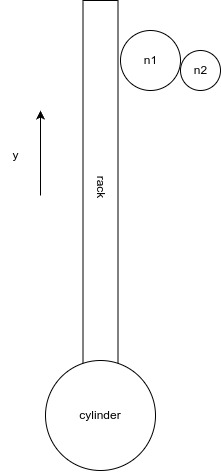




if the motor is mounted to the n2 gear shaft, rotational speed of n2 shaft,
\begin{align}
\omega_2 &= -\frac{y_m}{r_2} \omega_{cyl} cos(\omega_{cyl} t + \phi)\\
\end{align}

If seperately excited DC generator is used, generated terminal voltage,
\begin{align}
E_a &= -\frac{K\phi y_m}{r_2} \omega_{cyl} cos(\omega_{cyl} t + \phi)\\
\end{align}